# Data analysis
From MRP but modified.

In [2]:
# Initialization
# 1. Get the relevant dependencies 
import json
import os
import sys 
import random
import math
import numpy as np
import pandas as pd
import inspect
import os.path
import matplotlib.pyplot as plt

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from event_model import event_model as em

# resource switch
dataset={
    'small':'datasets/small_dataset',
    'bsphiphi': 'datasets/bsphiphi',
    'minibias': 'datasets/minibias'
}


In [3]:
# analysis variables
DATASET = 'bsphiphi'
load_percent = 0.5
shuffle = True

In [4]:
# read in the events -> from the folder choosen 
loaded_events = []
for (dirpath, dirnames, filenames) in os.walk(os.path.abspath(os.path.join('..', dataset[DATASET]))):
    if shuffle:
        random.shuffle(filenames)

    for i, filename in enumerate(filenames):
        # Get an event
        f = open(os.path.realpath(os.path.join(dirpath, filename)))
        json_data = json.loads(f.read())
        loaded_events = loaded_events + [em.event(json_data)]
        f.close()
        
        if i == int(load_percent * len(filenames)):
            print(f'successfully loaded {i} events from {DATASET}')
            break


successfully loaded 500 events from bsphiphi


## Check about the distance between the modules etc.

In [5]:
# is the distance beween the parts of one module always the same?
# is this the thickness of the module (why are there some hits on one side and some on the othere?)

event = loaded_events[1] # take the first of the elements for this check

event.module_zs
for module in event.module_zs:
    print(module)
    print(list(module)[0]-list(module)[1])
    #print(module.hits)
    # pretty damn the same
    # distance 1.16
    # lets check how many hits might be affected
    print(module)
    break
print(len(event.module_zs)) # -> 52 modules with two parts always
    

{-288.08, -286.918}
-1.1619999999999777
{-288.08, -286.918}
52


In [6]:
# Creation of an csv files with the modules positions and distances
coordinates = []
distances = []
last = -288.080
for i,module in enumerate(event.module_zs):
    min_module = min(module)
    coordinates.append(min_module)
    distances.append(coordinates[-1]-(last))
    last = coordinates[-1]
df = pd.DataFrame([coordinates, distances])
#df.to_csv('module_positions_and_distaces.csv', index=False)

#If bug: #Debugging with 'del min'

## Visualisation of the "left and the right" hits

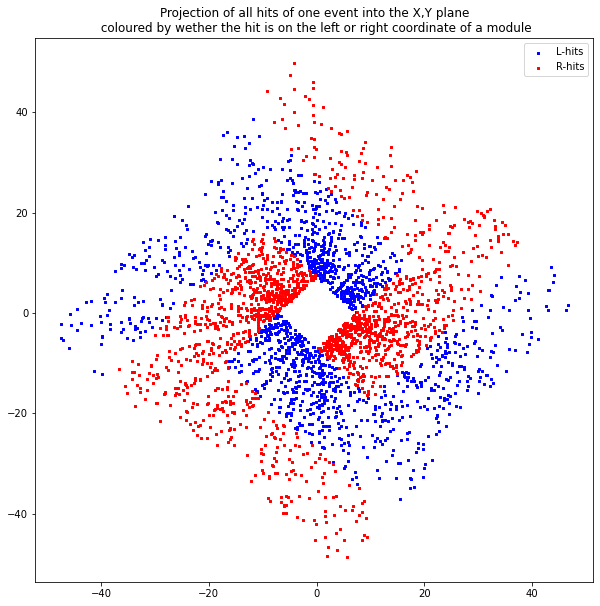

In [7]:
# Visualisation of the left and the right hits
# All hits that happend on the z-axis are "bring back together" in one dimension

left_hits = []   
right_hits = []

for module_number in range(52):
    l1 = min(event.modules[module_number].z)    
    # take the smallest z coordinate of each module (l1 is the small one but l2 could be the large one by for example doing max instead of min)
    # the hits put in the 'left_hits' are the ones happening in the smallest z
    # the hits put in the 'right_hits' are the ones happening in the largest z 
    # the smallest is on the left side and the largest is on the right side (for each module) > why ???
    hit_coords = np.zeros(shape=(2,len(event.modules[module_number].hits())))
    is_left = []
    
    for i, hit in enumerate(event.modules[module_number].hits()):
        hit_coords[0,i] = hit.x
        hit_coords[1,i] = hit.y
        is_left.append(hit.z==l1)

    left_hits.append(hit_coords[:,is_left])    
    right_hits.append(hit_coords[:,[not e for e in is_left]])    



left_hits = np.concatenate(left_hits, axis=1)
right_hits = np.concatenate(right_hits, axis=1)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)


ax1.scatter(left_hits[0,:], left_hits[1,:], s=5, c='b', marker="s", label='L-hits')
ax1.scatter(right_hits[0,:], right_hits[1,:], s=5, c='r', marker="s", label='R-hits')
ax1.legend()
ax1.set_title('Projection of all hits of one event into the X,Y plane\n coloured by wether the hit is on the left or right coordinate of a module')
plt.show()

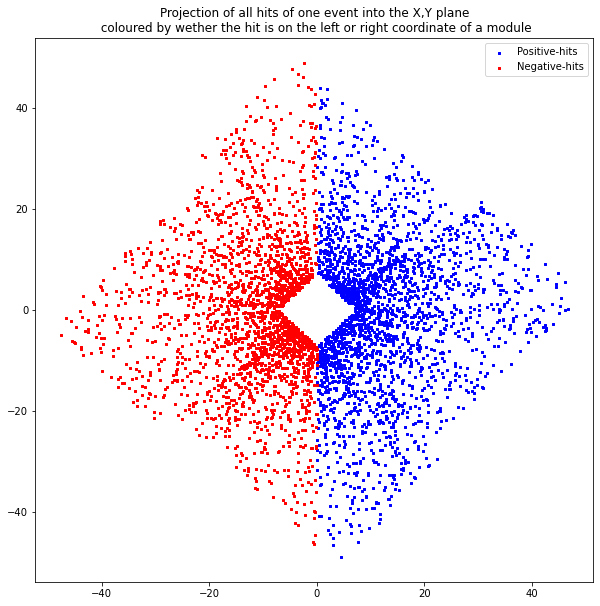

In [49]:
# Visualisation of the postitive and negative x left and the right hits

x_positive_hits = []   
x_negative_hits = []

for module_number in range(52):

    hit_coords = np.zeros(shape=(2,len(event.modules[module_number].hits())))
    x_is_positive = []
    
    for i, hit in enumerate(event.modules[module_number].hits()):
        hit_coords[0,i] = hit.x
        hit_coords[1,i] = hit.y
        x_is_positive.append(hit.x > 0)
    

    x_positive_hits.append(hit_coords[:,x_is_positive])    
    x_negative_hits.append(hit_coords[:,[not e for e in x_is_positive]])    


x_positive_hits = np.concatenate(x_positive_hits, axis=1)
x_negative_hits = np.concatenate(x_negative_hits, axis=1)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(111)


ax1.scatter(x_positive_hits[0,:], x_positive_hits[1,:], s=5, c='b', marker="s", label='Positive-hits')
ax1.scatter(x_negative_hits[0,:], x_negative_hits[1,:], s=5, c='r', marker="s", label='Negative-hits')
ax1.legend()
ax1.set_title('Projection of all hits of one event into the X,Y plane\n coloured by wether the hit is on the left or right coordinate of a module')
plt.show()

## Visualisation of the postitive and negative x coordinates depending on the modules numbering
### NB: All hits that happend on the z-axis are "bring back together" in one dimension

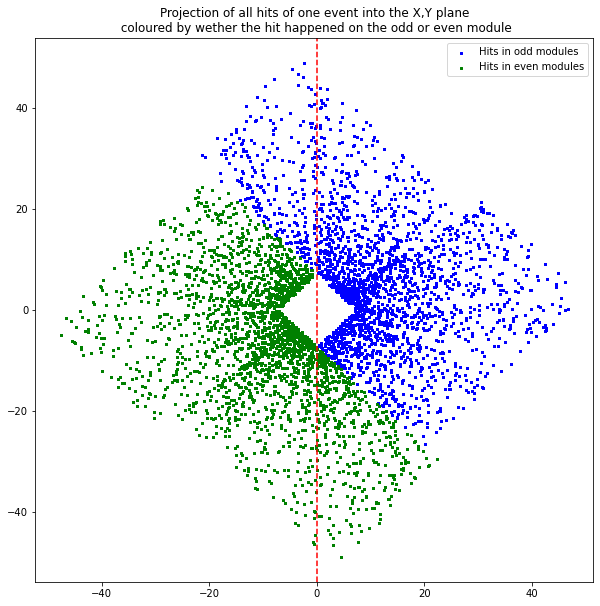

In [48]:
x_hits_odd = []   
x_hits_even = []

for module_number in range(52):

    hit_coords = np.zeros(shape=(2,len(event.modules[module_number].hits())))
    
    if module_number % 2 == 1: #odd
        for i, hit in enumerate(event.modules[module_number].hits()):
            hit_coords[0,i] = hit.x
            hit_coords[1,i] = hit.y

            x_hits_odd.append(hit_coords)
    else:                       #even
        for i, hit in enumerate(event.modules[module_number].hits()):
            hit_coords[0,i] = hit.x
            hit_coords[1,i] = hit.y
            x_hits_even.append(hit_coords)


x_hits_odd = np.concatenate(x_hits_odd, axis=1)
x_hits_even = np.concatenate(x_hits_even, axis=1)


plt.figure(figsize=(10,10))
plt.scatter(x_hits_odd[0,:], x_hits_odd[1,:], s=5, c='b', marker="s", label='Hits in odd modules')
plt.scatter(x_hits_even[0,:], x_hits_even[1,:], s=5, c='g', marker="s", label='Hits in even modules')
plt.axvline(x=0, color='red', linestyle='--')
plt.legend()
plt.title('Projection of all hits of one event into the X,Y plane\n coloured by wether the hit happened on the odd or even module')
plt.show()



## Creation of a class 'particle'

In [12]:
# particle class to properly handle the real tracks -> might want to plot angles where we see the highest density
class particle(object):
    def __init__(self, particle, event):
        self.key = particle[0]
        self.pid = particle[1]
        self.p = particle[2]
        self.pt = particle[3]
        self.eta = particle[4]
        self.phi = particle[5]
        self.isLong = particle[6]
        self.isDown = particle[7]
        self.hasVelo = particle[8]
        self.hasUT = particle[9]
        self.hasScifi = particle[10]
        self.fromBeautyDecay = particle[11]
        self.fromCharmDecay = particle[12]
        self.fromStrangeDecay = particle[13]
        self.charge = particle[14]
        self.hits = particle[15]
        self.track = [hit for hit in event.hits if hit.id in self.hits]
        self.is_decay = any([particle[11], particle[12], particle[13]])
        self.is_noise = len(self.track) < 3
        # compare dist of 2 points to center
        #self.left_to_right = (math.sqrt(self.track[0].x**2 * self.track[0].y**2) < math.sqrt(self.track[1].x**2 * self.track[1].y**2))

def give_track_coords(self):
    coords = np.zeros(shape=(2,len(self.track)))
    for i, hit in enumerate(self.track):
        coords[0,i] = hit.x
        coords[1,i] = hit.y 
    return coords

In [13]:
def give_track_coords(particle):
    coords = np.zeros(shape=(3,len(particle.track)))
    for i, hit in enumerate(particle.track):
        coords[0,i] = hit.x
        coords[1,i] = hit.y 
        coords[2,i] = hit.z
    return coords

In [14]:
all_event_particles = []
hits_to_remove = []
all_track_hits = []

for i,event in enumerate(loaded_events[:10]):
    #print(i)
    for part in event.montecarlo.get('particles'):
        temp_particle = particle(part, event)
        all_event_particles = all_event_particles + [temp_particle]
        for hit in temp_particle.track:
            hits_to_remove.append(hit.id)
        all_track_hits = all_track_hits + temp_particle.track

noise_hits = [hit for hit in event.hits if hit.id not in hits_to_remove]
noise_coords = np.zeros(shape=(2,len(noise_hits)))

for i, hit in enumerate(noise_hits):
    noise_coords[0,i]= hit.x
    noise_coords[1,i]= hit.y

track_hit_coords = np.zeros(shape=(2, len(all_track_hits))) 
for i, hit in enumerate(all_track_hits):
    track_hit_coords[0,i] = hit.x
    track_hit_coords[1,i] = hit.y



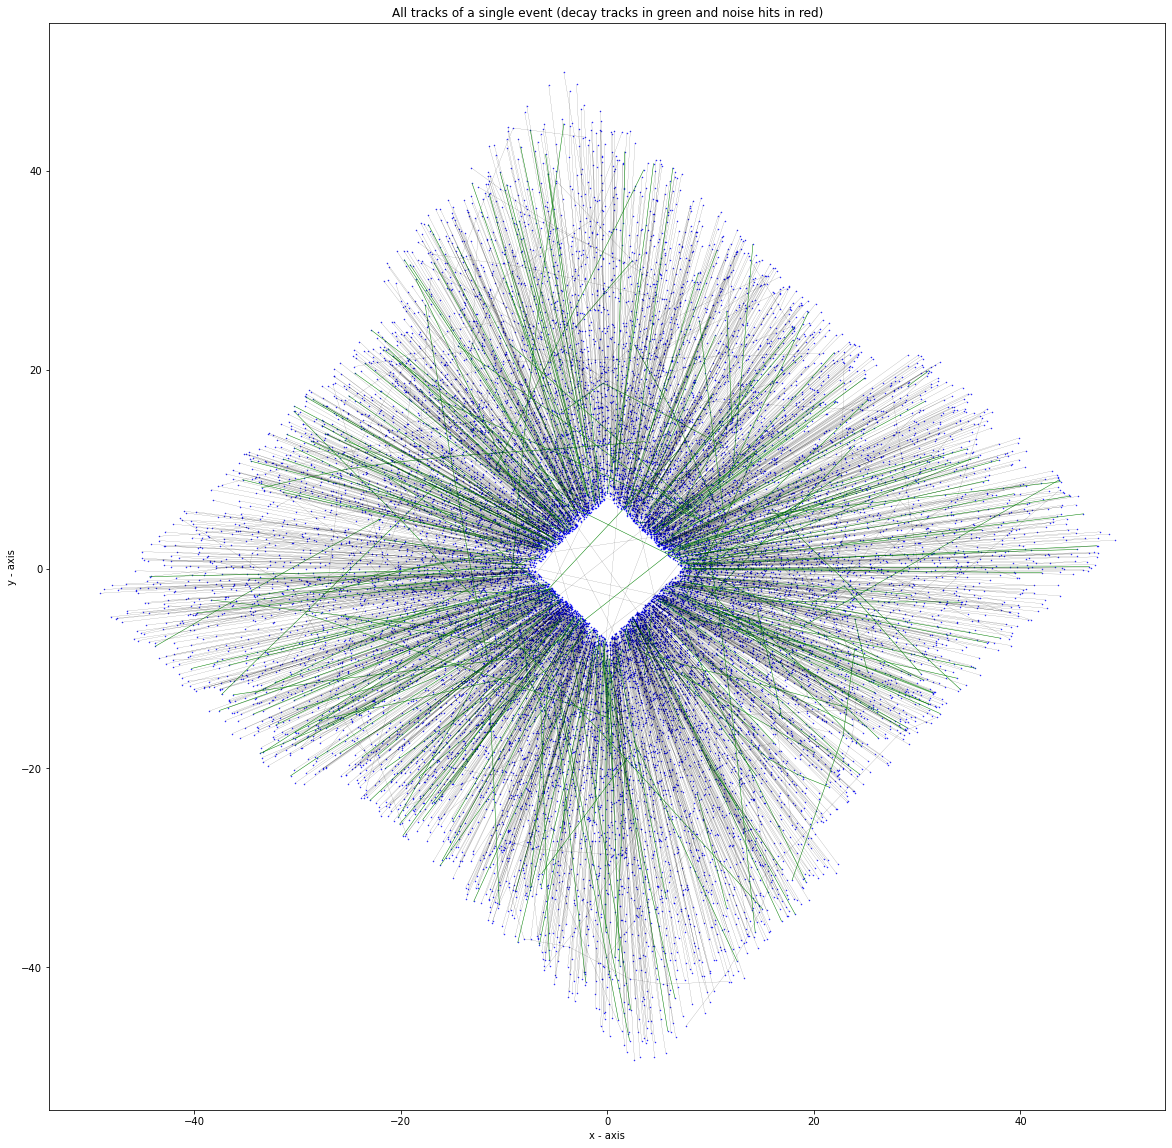

In [15]:
#Plot
fig = plt.figure(figsize=(20,20))
ax  = fig.add_subplot(111)

for particle in all_event_particles:
    coords = give_track_coords(particle)
    color = 'black'
    width = 0.1
    label = 'particle track'
    if particle.is_decay:
        width = 0.5
        color = 'green'
        label = 'decay track'
    ax.plot(coords[0], coords[1], linewidth=width, color=color, markeredgewidth=2, label = label)
ax.scatter(track_hit_coords[0],track_hit_coords[1], s=0.2, c ='b')
ax.scatter(noise_coords[0],noise_coords[1], s=0.2, c ='r')

ax.set_xlabel('x - axis')
# Set the y axis label of the current axis.
ax.set_ylabel('y - axis')
# Set a title of the current axes.
ax.set_title('All tracks of a single event (decay tracks in green and noise hits in red)')
# show a legend on the plot
#ax.legend()
# Display a figure.
plt.show()
#plt.savefig('test')

> There is a problem with this code, the noise hits don't compile and so don't appear.

In [16]:
# THIS IS NOT VERY USEFUL FOR ME


# Lets analyse angles of the particles (distribution of this)
all_particles = all_event_particles
all_angles = []
num_hits = []

# print(f'number of particles were looking at {len(all_particles)}')

for particle in all_particles:
    all_angles = all_angles + [particle.phi]
    num_hits = num_hits + [len(particle.track)]

#print(all_particles)
print(len(all_angles))

3559


In [17]:
all_event_particles = []
hits_to_remove = []
all_track_hits = []

for i,event in enumerate(loaded_events[:100]):
    #print(i)
    for part in event.montecarlo.get('particles'):
        temp_particle = particle(part, event)
        all_event_particles = all_event_particles + [temp_particle]
        for hit in temp_particle.track:
            hits_to_remove.append(hit.id)
        all_track_hits = all_track_hits + temp_particle.track

TypeError: 'particle' object is not callable

In [ ]:
################ checking how many tracks cross the beam line ##################
################ also checking how many tracks dont have consecutive triplets ##########
# the consecutive thing is really not nice
beam_crossing_particles = []
no_cosecutive_triplet = []

# id say we have a beam cross if either x or y change sign among hits
for particle in all_particles:
    x_p, x_n, y_p, y_n, = False, False, False, False
    triplet = 0
    last_module = -2
    for hit in particle.track:
        x_p = hit.x >0 or x_p
        x_n = hit.x <0 or x_n
        y_p = hit.y >0 or y_p
        y_n = hit.y <0 or y_n
        
        if triplet < 3:
            if hit.module_number in (last_module + 1,last_module + 1):
                triplet += 1
                last_module = hit.module_number
            else:
                triplet = 1
                last_module = hit.module_number
                
    if x_p + x_n + y_p + y_n > 2:
        beam_crossing_particles = beam_crossing_particles + [particle]
    if triplet < 3:
        no_cosecutive_triplet = no_cosecutive_triplet + [particle]
print(len(all_particles))
print('beam_crossing')
print(len(beam_crossing_particles))
print(len(beam_crossing_particles)/len(all_particles))
print('no_co')
print(len(no_cosecutive_triplet))
print(len(no_cosecutive_triplet)/len(all_particles))


# 5% of the tracks seem to cross the line

4572
beam_crossing
199
0.04352580927384077
no_co
4571
0.9997812773403325


In [ ]:
decay = 0
for particle in all_particles:
    if particle.is_decay:
        decay +=1
print(decay)
# abput 5% of particles from decay

621


In [ ]:
decay = 0
for particle in beam_crossing_particles:
    if particle.is_decay:
        decay +=1
print(decay)
# ~20%

#775 -> 132

82


## Track regression analysis


In [ ]:
import math

def dotproduct(v1, v2):
  return sum((a*b) for a, b in zip(v1, v2))

def length(v):
  return math.sqrt(dotproduct(v, v))

def angle(v1, v2):
  return math.acos(dotproduct(v1, v2) / (length(v1) * length(v2)))


In [ ]:
from sklearn.linear_model import LinearRegression

def track_regression_analysis(particle):
    my_arr = np.zeros((len(particle.track),2))
    z = np.zeros((len(particle.track),1))
    for i, hit in enumerate(particle.track):
        my_arr[i,0] = hit.x        
        my_arr[i,1] = hit.y
        z[i] = hit.z
        
    x_reg = LinearRegression().fit(z,my_arr[:,0])
    y_reg = LinearRegression().fit(z,my_arr[:,1])
    
    dev_hit = particle.track[0]
    x_pred = x_reg.predict(np.array([dev_hit.z]).reshape(-1, 1))
    y_pred = y_reg.predict(np.array([dev_hit.z]).reshape(-1, 1))
    pred = (x_pred,y_pred)
    
    max_dev_hit = math.sqrt((x_pred[0]-dev_hit.x)**2 + (y_pred[0]-dev_hit.y)**2)
    max_angle = 0
    last_hit = dev_hit
    
    for hit in particle.track[1:]:
        x_pred = x_reg.predict(np.array([hit.z]).reshape(-1, 1))
        y_pred = y_reg.predict(np.array([hit.z]).reshape(-1, 1))
        new_deviation = math.sqrt((x_pred[0]-hit.x)**2 + (y_pred[0]-hit.y)**2)
        print()
        new_angle = angle((x_reg.coef_, y_reg.coef_,1), (hit.x-last_hit.x,hit.y-last_hit.y,hit.z-last_hit.z))
        if new_deviation >  max_dev_hit:
            max_dev_hit = new_deviation
            dev_hit = hit
            pred = (x_pred,y_pred)
            
        if new_angle > max_angle:
            max_angle = new_angle
            
        last_hit = hit
    return max_dev_hit, hit, pred, max_angle
    

print(track_regression_analysis(all_particles[0]))
    









(0.031155956609236524, #935 module 15 {1.361, -6.667, 0.581}, (array([3.20214102]), array([-15.71196468])), 0.0016611114044957514)


In [ ]:
################ here I want to check what is the max and expected deviation of points from the line ############
max_angle = 0
max_deviation = 0

for particle in all_particles[:50]:
    dev_hit, hit, pred, angle = track_regression_analysis(particle)
    
    if max_angle < angle:
        max_angle = angle
    if max_deviation < dev_hit:
        max_deviation = dev_hit

print(max_angle)
print(max_deviation)

TypeError: 'float' object is not callable